<a href="https://colab.research.google.com/github/Y-Srivaishnavi/posthoc-xai/blob/main/codeXAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv("/content/drive/MyDrive/G-project/datasets/splice/dna.csv")
df

A0  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  A171  A172  A173  A174  \
0      0   1   0   0   0   0   1   0   0   0  ...     1     0     0     0   
1      0   0   1   0   0   1   0   0   0   0  ...     0     0     0     1   
2      0   0   1   0   0   1   0   1   0   0  ...     0     1     0     0   
3      0   0   0   0   0   0   0   1   0   0  ...     0     0     1     0   
4      0   1   0   0   0   0   0   1   0   0  ...     0     1     0     0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   ...   ...   
3181   0   0   0   1   0   0   0   1   0   0  ...     1     0     0     0   
3182   0   0   1   0   0   0   0   0   0   0  ...     1     0     0     0   
3183   0   0   1   0   0   1   0   1   0   0  ...     0     0     1     0   
3184   0   0   0   0   0   0   0   1   0   1  ...     0     0     0     0   
3185   1   0   0   0   0   1   1   0   0   0  ...     0     0     0     0   

      A175  A176  A177  A178  A179  class  
0        0     1     1     0     0      3  
1        0     0     0     1     0      3  
2        0     1     0     0     1      3  
3        0     1     0     0     1      1  
4        1     0     1     0     0      2  
...    ...   ...   ...   ...   ...    ...  
3181     0     0     0     0     1      3  
3182     0     0     1     0     0      3  
3183     1     0     1     0     0      2  
3184     0     1     0     1     0      1  
3185     0     1     0     0     1      1  

[3186 rows x 181 columns]

In [3]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
X.shape, y.shape

((3186, 180), (3186,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
model.score(X_test, y_test)

0.9028213166144201

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.87      0.87       154
           2       0.82      0.92      0.86       153
           3       0.96      0.91      0.94       331

    accuracy                           0.90       638
   macro avg       0.88      0.90      0.89       638
weighted avg       0.91      0.90      0.90       638



## Partial Dependence Plot

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


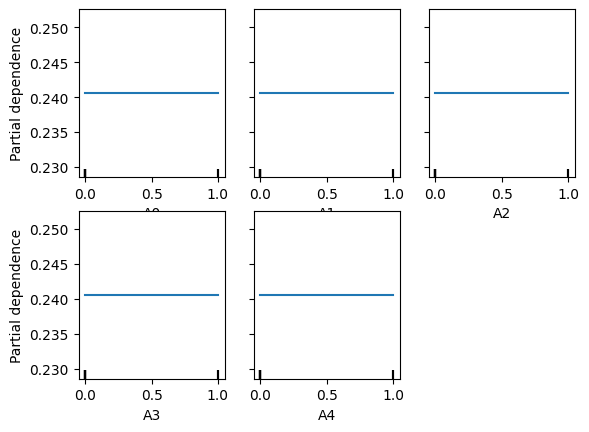

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

feat = X_train.columns[:5]
display = PartialDependenceDisplay.from_estimator(
    model, X_train, feat, target=1)

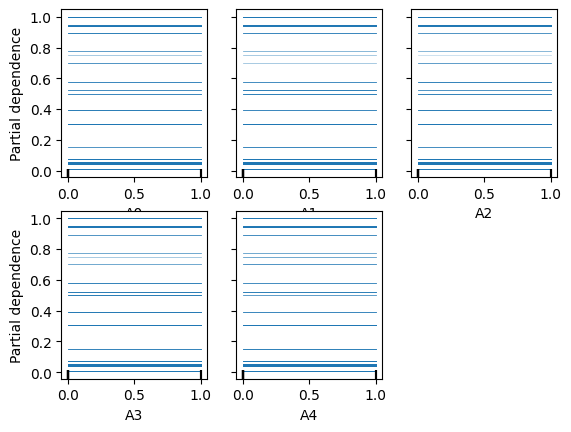

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

feat = X_train.columns[:5]
display = PartialDependenceDisplay.from_estimator(
    model, X_train, feat, target=3, kind="individual")

## LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=736320a142d3814be049f25d5e0dfe5531a1ca2960bfeb93e9fef0a15e0f6587
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=y.unique())
i = 0
exp = explainer.explain_instance(X_test.values[i], model.predict_proba, num_features=30)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(exp.show_in_notebook())

None


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=y.unique())
i = 0
exp = explainer.explain_instance(X_test.values[i], model.predict_proba, num_features=10)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(exp.show_in_notebook())

None


In [ ]:
y_test.values[i]

1

## SHAP

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.6 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

In [ ]:
shap_values.shape, X_test.values.shape

((638, 180, 3), (638, 180))

In [ ]:
len(X.columns)

180

In [ ]:
shap.initjs()

In [ ]:
exp = shap.Explanation(shap_values, data = X_test, feature_names=X.columns)

In [ ]:
explainer.expected_value[0]

0.24058084772370492

### Beeswarm

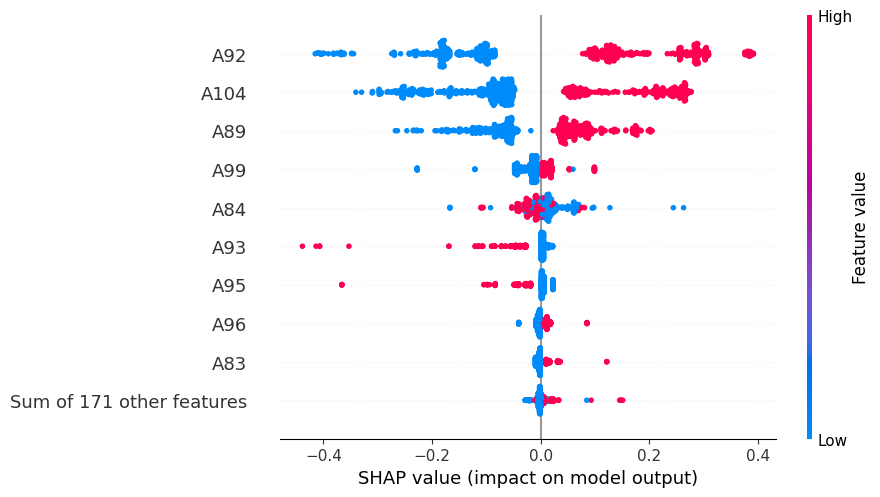

In [ ]:
shap.plots.beeswarm(exp[:,:,0])

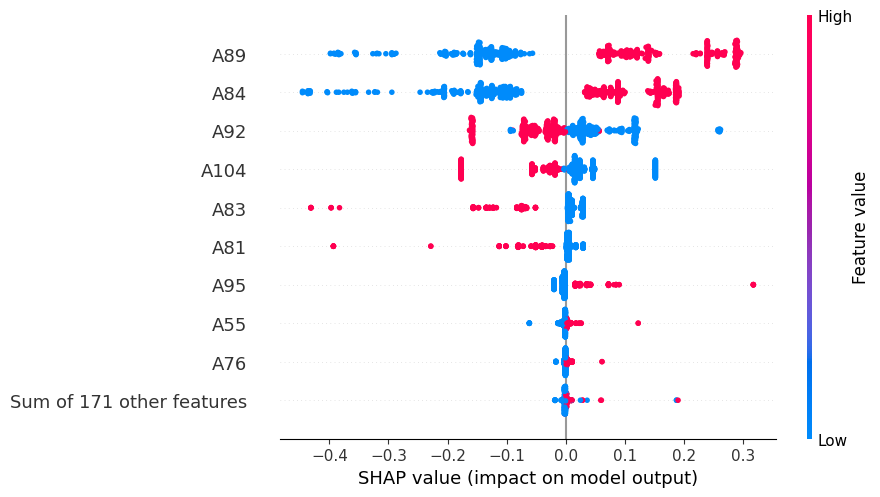

In [ ]:
shap.plots.beeswarm(exp[:,:,1])

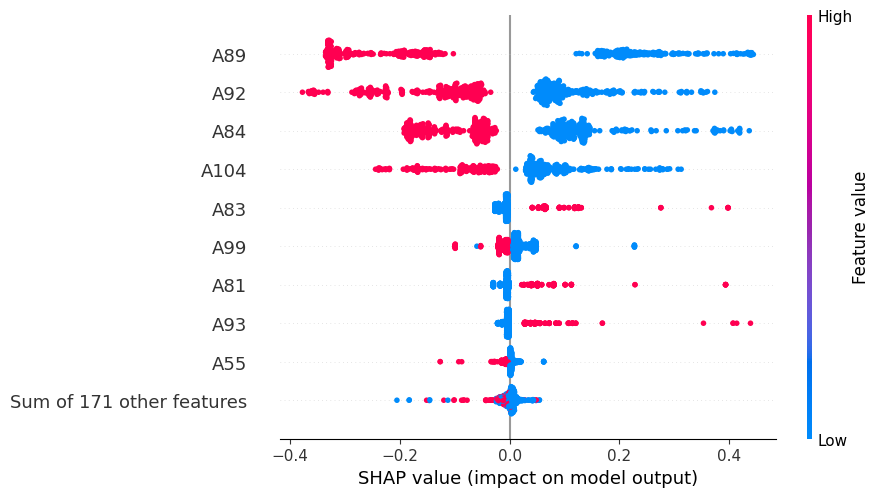

In [ ]:
shap.plots.beeswarm(exp[:,:,2])

### Bar Plot

In [ ]:
exp2 = shap.Explainer(model.predict, X_test)
shap_values = exp2(X_test)

PermutationExplainer explainer: 639it [01:03,  9.76it/s]                         


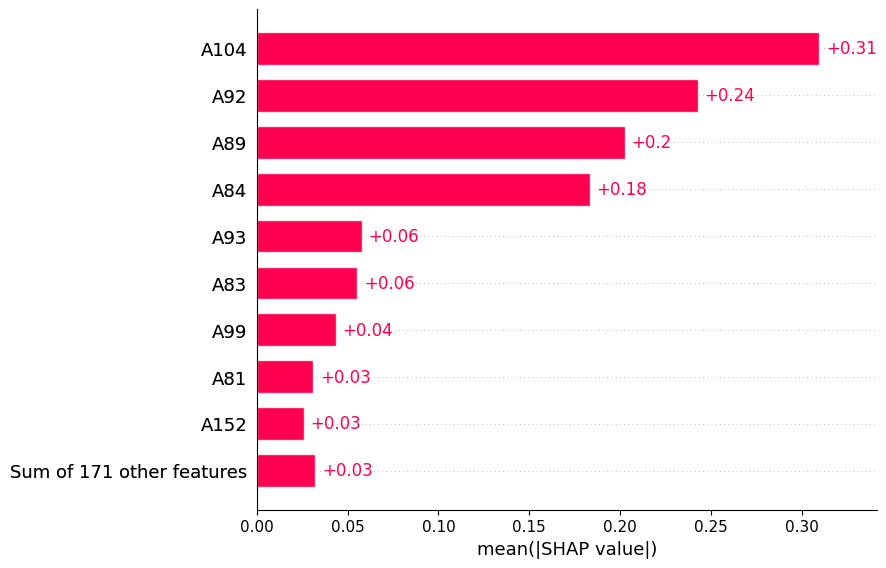

In [ ]:
shap.plots.bar(shap_values)

###  Waterfall

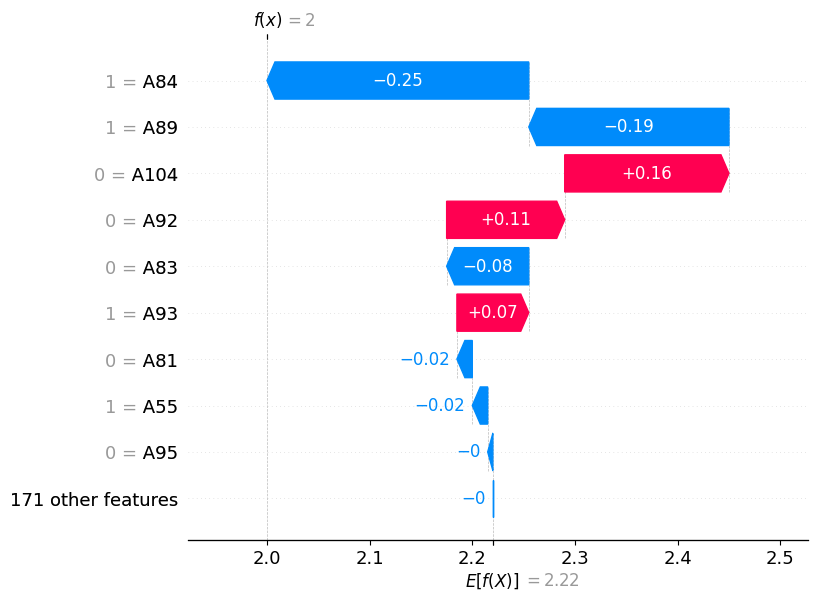

In [ ]:
shap.plots.waterfall(shap_values[0])

# Random Forest Classifier

In [5]:
model = RandomForestClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)

In [6]:
from sklearn.metrics import classification_report

print(model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

0.9184952978056427
              precision    recall  f1-score   support

           1       0.91      0.86      0.88       154
           2       0.88      0.90      0.89       153
           3       0.94      0.96      0.95       331

    accuracy                           0.92       638
   macro avg       0.91      0.90      0.91       638
weighted avg       0.92      0.92      0.92       638



## SHAP

In [7]:
!pip install shap

In [9]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
explainer.expected_value[0]

0.23973312401883828

SHAP value for first data point is slightly lesser than that of Decision Tree.

In [10]:
exp = shap.Explanation(shap_values, data = X_test, feature_names=X.columns)

### Beeswarm

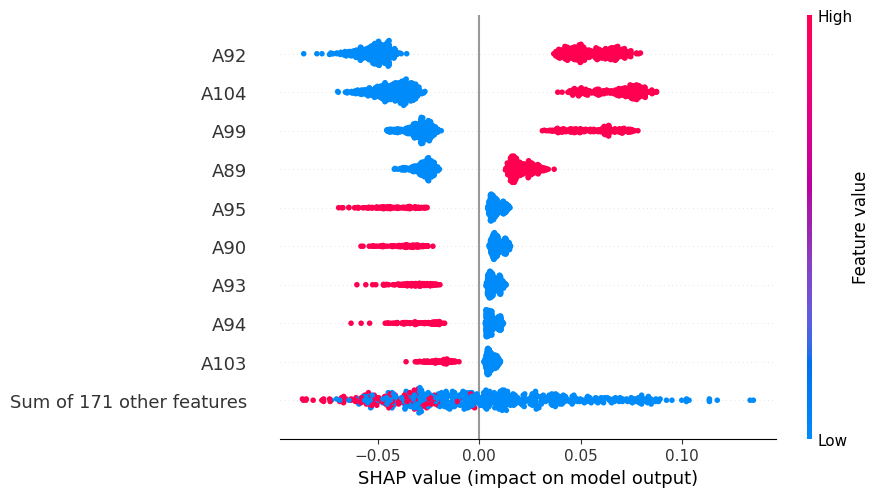

In [11]:
# for class 0
shap.plots.beeswarm(exp[:,:,0])

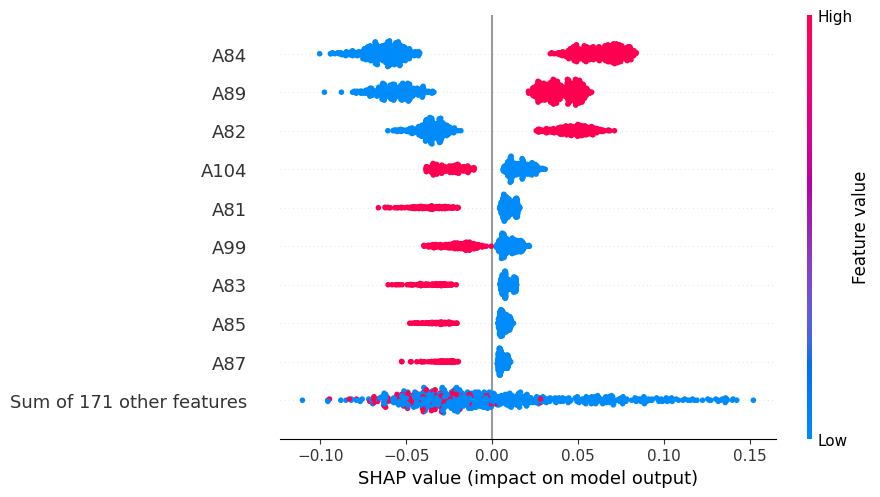

In [12]:
# for class 1
shap.plots.beeswarm(exp[:,:,1])

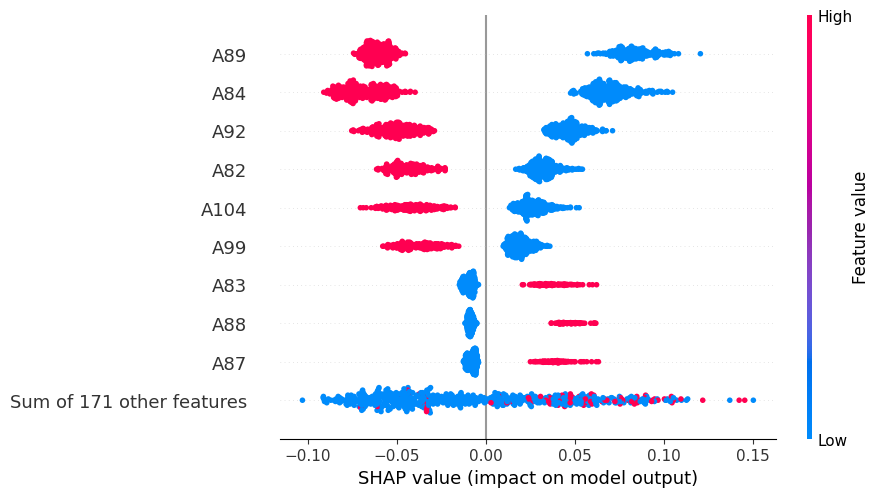

In [13]:
# for class 2
shap.plots.beeswarm(exp[:,:,2])

### Bar Plot

PermutationExplainer explainer: 639it [02:38,  4.00it/s]


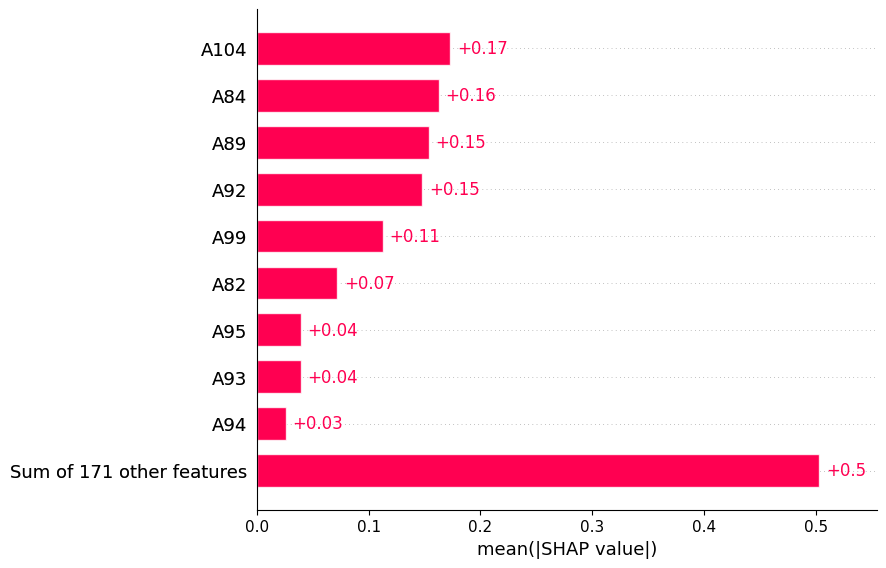

In [14]:
exp2 = shap.Explainer(model.predict, X_test)
shap_values = exp2(X_test)
shap.plots.bar(shap_values)

### Waterfall Plot

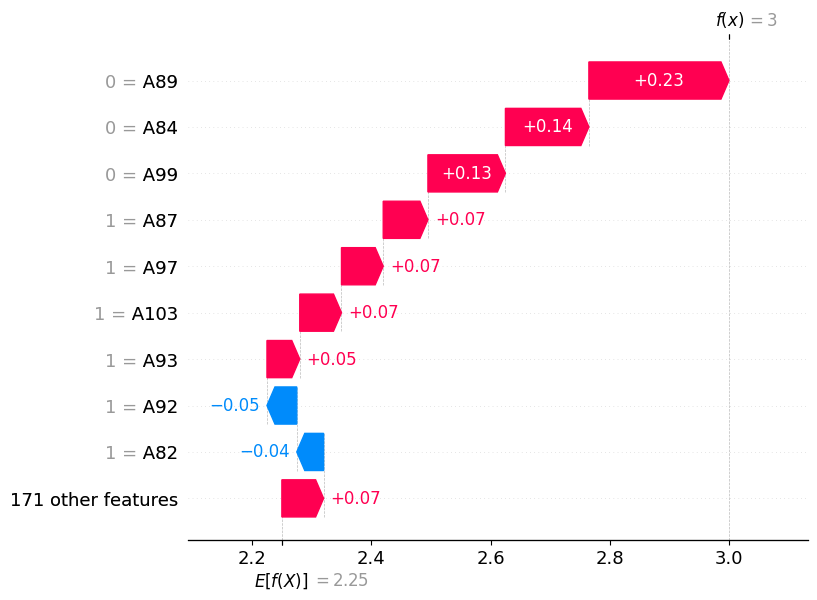

In [15]:
shap.plots.waterfall(shap_values[0])

## LIME

In [16]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=421a82e52ce76274940a741c07dbfdfddc8898d989d041975cd8bed4bbd0dbe7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [17]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=y.unique())
i = 0
exp = explainer.explain_instance(X_test.values[i], model.predict_proba, num_features=10)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
print(exp.show_in_notebook())

None


### PDP

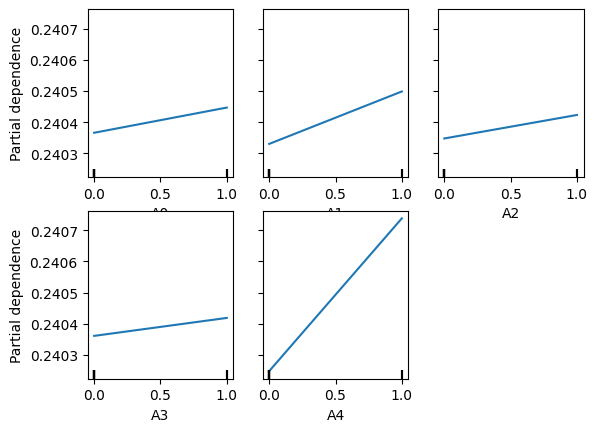

In [19]:
from sklearn.inspection import PartialDependenceDisplay

feat = X_train.columns[:5]
display = PartialDependenceDisplay.from_estimator(
    model, X_train, feat, target=1)